<a href="https://colab.research.google.com/github/Toyonaga15/Python-for-finance/blob/main/Risk_Return_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install investpy
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 22.5 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=c8a77bcef7b36ec7f6d95202a0d9f40df226060159241d12398418e26802fb63
  Stored in directory: /root/.cache/pip/wheels/9a/6f/8e/21466569113166e5859029b97fcae2b81af57063ed9faf698e
Successfully built investpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.6 MB/s

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
#Ask the user how many assets they want to analyze
num_assets = int(input('How many assets do you want to analyze? '))

#List to store asset names
assets = []

#Loop to gather asset names
for x in range(num_assets):
    asset = input(f'Enter the ticker symbol of asset based on yahoo finance {x+1}: ').strip().upper()
    assets.append(asset)

How many assets do you want to analyze? 6
Enter the ticker symbol of asset based on yahoo finance 1: goog
Enter the ticker symbol of asset based on yahoo finance 2: amzn
Enter the ticker symbol of asset based on yahoo finance 3: aapl
Enter the ticker symbol of asset based on yahoo finance 4: meta
Enter the ticker symbol of asset based on yahoo finance 5: msft
Enter the ticker symbol of asset based on yahoo finance 6: tsla


In [46]:
#Ask the user for the start and end dates for the analysis
start_date = input('Enter the start date in American format to analyze (ex: 2022-12-31): ')
end_date = input('Enter the end date in American format to analyze (ex: 2022-12-31): ')

Enter the start date in American format to analyze (ex: 2022-12-31): 2020-01-01
Enter the end date in American format to analyze (ex: 2022-12-31): 2023-01-25


In [47]:
#Create an empty dataframe to store the asset prices
prices = pd.DataFrame()

#Loop to download the prices for each asset using yfinance
for i in assets:
  prices[i] = yf.download(i, start = start_date, end = end_date)['Adj Close']

prices.head()
     

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GOOG,AMZN,AAPL,META,MSFT,TSLA
Date,,,,,,
2020-01-02 00:00:00-05:00,68.368500,94.900497,73.561531,209.779999,156.151962,28.684000
2020-01-03 00:00:00-05:00,68.032997,93.748497,72.846359,208.669998,154.207596,29.534000
2020-01-06 00:00:00-05:00,69.710503,95.143997,73.426826,212.600006,154.606186,30.102667
2020-01-07 00:00:00-05:00,69.667000,95.343002,73.081505,213.059998,153.196487,31.270666
2020-01-08 00:00:00-05:00,70.216003,94.598503,74.257103,215.220001,155.636673,32.809334


In [48]:
#Calculate the returns for each asset
assets_returns = prices.pct_change()
assets_returns.head()

#Remove any null values
assets_returns = assets_returns.dropna()

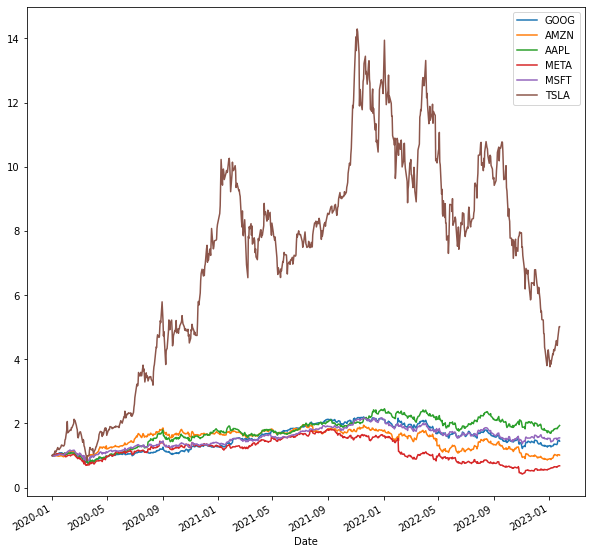

In [49]:
#Normalize the prices
normalized = prices/prices.iloc[0]
normalized.plot(figsize = (10,10));

In [50]:
#Calculate the volatility for each asset
assets_returns.std()

GOOG    0.021645
AMZN    0.024646
AAPL    0.023164
META    0.030527
MSFT    0.021864
TSLA    0.045569
dtype: float64

In [51]:
#Create a dataframe to store the volatility
volatility = pd.DataFrame(assets_returns.std(), columns= ['Vol'] )
#Create a dataframe to store the average return
average_returns = pd.DataFrame(assets_returns.mean(), columns= ['Returns'] )
#Combine the volatility and average returns dataframes
risk_return = pd.concat([average_returns, volatility], axis = 1)
risk_return

,Returns,Vol
GOOG,0.000718,0.021645
AMZN,0.000323,0.024646
AAPL,0.001127,0.023164
META,-0.000014,0.030527
MSFT,0.000808,0.021864
TSLA,0.003134,0.045569


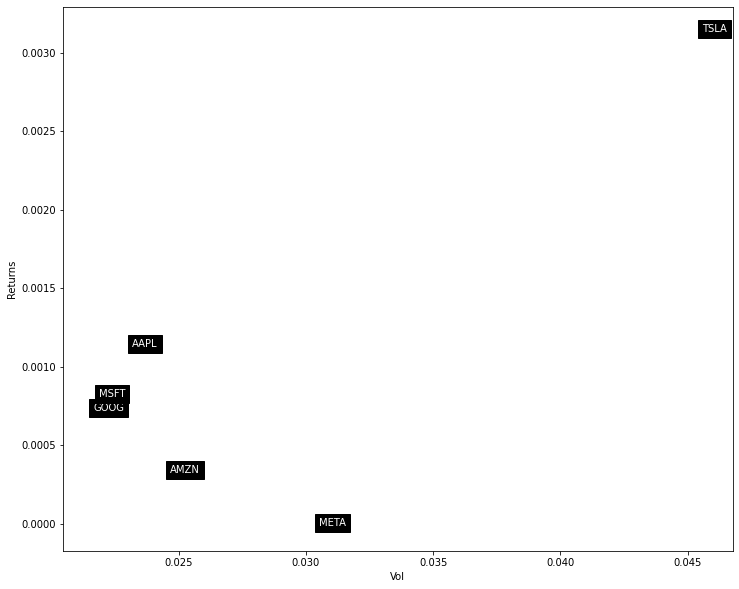

In [52]:
#Plot the data in a scatterplot
plt.subplots(figsize = (12,10))
sns.scatterplot(data = risk_return, x = 'Vol', y = 'Returns')

#Label each point on the scatterplot with the asset name
for i in range(risk_return.shape[0]):
  plt.text(x = risk_return.Vol[i], y = risk_return.Returns[i],
  s = risk_return.index[i],
  fontdict = dict(color = 'white', size = 10),
  bbox = dict(facecolor = 'black'))